# 我这不是一个笔记
- 二级
- 三级
- 四级

In [1]:
def foo():
    print('hello xxx world')

In [2]:
!pip install jieba

In [3]:
import jieba

In [8]:
!pip install wordcloud

# 中文分词库jieba

官方github仓库
https://github.com/fxsjy/jieba

扩展阅读：对Python中文分词模块结巴分词算法过程的理解和分析 https://blog.csdn.net/rav009/article/details/12196623   

In [4]:
import jieba 
import jieba.posseg as pseg  # 词性分析

paddle模式 百度的ai框架提供的支持

安装paddle的支持 官方github上提到的pip install paddlepaddle-tiny有问题

In [13]:
!pip install paddlepaddle  

In [5]:
jieba.enable_paddle()

AssertionError: In PaddlePaddle 2.x, we turn on dynamic graph mode by default, and 'data()' is only supported in static graph mode. So if you want to use this api, please call 'paddle.enable_static()' before this api to enter static graph mode.

## 分词

* 全模式：所有可能的拆分方式都分出来 出现很多重叠  
* 精确模式：精确地拆分句子 不允许重叠

In [8]:
seg_list = jieba.cut("今天真热", cut_all=False)
seg_list
print(", ".join(seg_list))

今天, 真热


In [6]:
strs=["我来到北京清华大学","乒乓球拍卖完了","中国科学技术大学"]
for str1 in strs:
    seg_list = jieba.cut(str1) # 使用paddle模式
    print("Paddle Mode: " + '/'.join(list(seg_list)))

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Think\AppData\Local\Temp\jieba.cache
Loading model cost 1.520 seconds.
Prefix dict has been built successfully.


Paddle Mode: 我/来到/北京/清华大学
Paddle Mode: 乒乓球/拍卖/完/了
Paddle Mode: 中国/科学技术/大学
Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


## 词性分析

In [9]:
words = pseg.cut("一片寂静之中，只听得蹄声嗒嗒，车轮在石板上隆隆滚动",use_paddle=True)
for word, flag in words:
     print('%s %s' % (word, flag),end=' ')

一片 m 寂静 a 之中 r ， x 只 d 听 v 得 ud 蹄声 n 嗒 o 嗒 o ， x 车轮 n 在 p 石板 n 上 f 隆隆 o 滚动 v 

In [15]:
words

<generator object cut at 0x0000020D4C59DF20>

In [42]:
words = pseg.cut("一片寂静之中，只听得蹄声嗒嗒，车轮在石板上隆隆滚动",use_paddle=True)
type(words)

generator

In [43]:
temp = next(words)
type(temp)

jieba.posseg.pair

分词之后是jieba特有的pair对象 赋值类似于元祖 但是没有索引

In [24]:
temp

pair('一片', 'm')

In [26]:
a,b = temp

In [27]:
print(a)
print(b)

一片
m


<table>
<thead>
<tr>
<th>标签</th>
<th>含义</th>
<th>标签</th>
<th>含义</th>
<th>标签</th>
<th>含义</th>
<th>标签</th>
<th>含义</th>
</tr>
</thead>
<tbody>
<tr>
<td>n</td>
<td>普通名词</td>
<td>f</td>
<td>方位名词</td>
<td>s</td>
<td>处所名词</td>
<td>t</td>
<td>时间</td>
</tr>
<tr>
<td>nr</td>
<td>人名</td>
<td>ns</td>
<td>地名</td>
<td>nt</td>
<td>机构名</td>
<td>nw</td>
<td>作品名</td>
</tr>
<tr>
<td>nz</td>
<td>其他专名</td>
<td>v</td>
<td>普通动词</td>
<td>vd</td>
<td>动副词</td>
<td>vn</td>
<td>名动词</td>
</tr>
<tr>
<td>a</td>
<td>形容词</td>
<td>ad</td>
<td>副形词</td>
<td>an</td>
<td>名形词</td>
<td>d</td>
<td>副词</td>
</tr>
<tr>
<td>m</td>
<td>数量词</td>
<td>q</td>
<td>量词</td>
<td>r</td>
<td>代词</td>
<td>p</td>
<td>介词</td>
</tr>
<tr>
<td>c</td>
<td>连词</td>
<td>u</td>
<td>助词</td>
<td>xc</td>
<td>其他虚词</td>
<td>w</td>
<td>标点符号</td>
</tr>
<tr>
<td>PER</td>
<td>人名</td>
<td>LOC</td>
<td>地名</td>
<td>ORG</td>
<td>机构名</td>
<td>TIME</td>
<td>时间</td>
</tr>
</tbody>
</table>

In [39]:
# 滤出所有名词
def foo(flag,sort=['n']):
    if flag in sort:
        return True
    return False

In [12]:
words = pseg.cut("一片寂静之中，只听得蹄声嗒嗒，车轮在石板上隆隆滚动",use_paddle=True)  # 生成器

for word,flag in words:
    if foo(flag):
        print(word)

蹄声
车轮
石板


In [39]:
words = pseg.cut("一片寂静之中，只听得蹄声嗒嗒，车轮在石板上隆隆滚动",use_paddle=True)  # 生成器

[word for word,flag in words if foo(flag)] 

['蹄声', '车轮', '石板']

## 停用词去除和词云制作

读一本金庸小说进来

In [13]:
import re
strs = (re.sub('[^\u4e00-\u9fa50-9]',' ',strs))

TypeError: expected string or bytes-like object

In [37]:
with open('./source/jinyong/金庸-天龙八部txt精校版.txt','r') as fp:
    strs = fp.read()

len(strs)

1283405

In [40]:
words = pseg.cut(strs[10000:50000])  # 生成器
N = [word for word,flag in words if foo(flag,['v'])] 

In [41]:
len(N)

5042

In [50]:
'少女' in N

False

停用词处理

In [21]:
# 读入停用词 做成list
def get_stopwords_list():
    #按行制作list 并且去掉行首位的空格
    stopwords = [line.strip() for line in open('./source/baidu_stopwords.txt',encoding='UTF-8').readlines()]  
    return stopwords

In [25]:
# 删除停用词
def remove_stopwords(sentence_list, stopwords_list):
    # 去停用词
    res = []
    for word in sentence_list:
        if word not in stopwords_list:
#             word = re.sub(r'[0123456789，。.\s]+', '', word)  # 去掉数字标点和空格
            res.append(word)
    return res

In [51]:
wordlist = remove_stopwords(N, get_stopwords_list())
len(wordlist)

3886

In [52]:
wordlist

['吃',
 '无',
 '深交',
 '瞧',
 '会',
 '笑',
 '定',
 '出于',
 '无意',
 '饿',
 '计较',
 '得罪',
 '不算',
 '扫',
 '笑',
 '请教',
 '请教',
 '抽出',
 '倒转',
 '拱手',
 '誉道',
 '请',
 '练',
 '瞧',
 '坐在',
 '起身',
 '涨',
 '说',
 '去',
 '想',
 '练',
 '练',
 '向来',
 '爱',
 '瞧',
 '使',
 '不妨',
 '瞧',
 '喝道',
 '挥',
 '摇',
 '摇头',
 '说道',
 '怕',
 '输',
 '怕',
 '说',
 '说',
 '犹如',
 '听',
 '忍不住',
 '笑',
 '占',
 '笑',
 '扫',
 '无遗',
 '伸剑',
 '喝道',
 '装傻',
 '送',
 '刺入',
 '露',
 '说道',
 '装傻',
 '活得',
 '受',
 '指使',
 '直说',
 '霸霸',
 '爱',
 '瞧',
 '打架',
 '住',
 '喜',
 '喜',
 '离苦',
 '获',
 '喜',
 '舍',
 '派',
 '说',
 '回收',
 '挥出',
 '侧',
 '闪避',
 '缩回',
 '肿',
 '吃',
 '料想',
 '知',
 '掌',
 '避开',
 '装傻',
 '玩弄',
 '决无',
 '出',
 '掌',
 '得手',
 '呆',
 '抓住',
 '提起',
 '喝道',
 '了不起',
 '知',
 '摔落',
 '滚',
 '撞',
 '不忍',
 '抢过去',
 '伸手',
 '扶',
 '说道',
 '厮混',
 '了摸',
 '说道',
 '打架',
 '砍',
 '杀',
 '好看',
 '瞧',
 '好玩',
 '再见',
 '再见',
 '走',
 '纵身',
 '跃出',
 '拦',
 '说道',
 '走',
 '说',
 '看',
 '看',
 '走',
 '磕',
 '响头',
 '说',
 '放屁',
 '放屁',
 '伸拳',
 '击去',
 '夹',
 '不识',
 '避让',
 '缠住',
 '腻',
 '缠',
 '吃',
 '缩手',
 '只见',
 '缠',
 '惊呼',
 '挥',
 '振',
 '缠'

词云库安装

In [1]:
!pip install wordcloud

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image

In [53]:
# 必须给个符号分隔开分词结果来形成字符串,否则不能绘制词云
wordstr = " ".join(wordlist)

In [47]:
wordcloud = WordCloud(
        # 设置字体，不指定就会出现乱码
        font_path=r'C:\Windows\Fonts\msjh.ttc',
        # 设置背景色
        background_color='white',
        # 最大字体
        max_font_size=80,
        # 最小字体
        min_font_size=20,
        mode='RGBA',
#         mask=np.array(Image.open( r'./pic/武侠.png'))
        #colormap='pink'
        )

In [54]:
wordcloud.generate(wordstr)

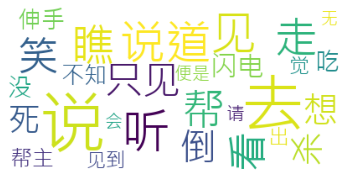

In [55]:
plt.figure("jinyong")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


wordcloud.to_file("./pic/cloud_result.png")